##### Challenge-Pokemon_Go

### Multiclass Classification

### Dataset Preparation

In [180]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import cv2

In [181]:
p=Path('Train/Images/')
print(p)

Train/Images


In [182]:
data=pd.read_csv('Train/train.csv',index_col=False)
data=data.values
temp={}
for i in range(data.shape[0]):
    temp[data[i][0]]=data[i][1]

In [183]:
dirs=p.glob('*')
image_data=[]
labels=[]
for img_name in dirs: ## Iterating through all directory present in inside Images Folder
    label=str(img_name).split('/')[-1]
    img=cv2.imread(str(img_name))
    img=cv2.resize(img,(50,50))
    image_data.append(img)
    labels.append(temp[label])

In [184]:
image_data=np.array(image_data)
labels=np.array(labels)

In [185]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(labels)
classes=le.classes_
labels=le.transform(labels)

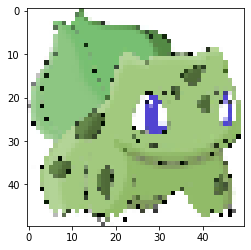

In [186]:
### Visualizing Some Images
import matplotlib.pyplot as plt
def showImg(img):
    plt.imshow(img)
    plt.show()
    return
showImg(image_data[5])

### SVM Classifier

In [187]:
class SVM():
    def __init__(self,c=1.0):
        self.c=c
        self.b=0
        self.w=0
    def HingeLoss(self,w,b,X,Y):
        L=0.5*np.sum(w**2)
        #t=Y*(np.dot(X,W)+b)
        m=X.shape[0]
        for i in range(m):
            t=Y[i]*(np.sum(X[i]*w)+b)
            L+=self.c*(max(0,1-t))
        return L
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_iterations=300):
        m=X.shape[0]   # No. of Training Examples
        n=X.shape[1]   # No. of Features
        alpha=learning_rate
        w=np.zeros((n,)) # Initialisation of the weights
        c=self.c
        b=0 #Bias Term
        Loss=[]
        ## Training
        for i in range(max_iterations):
            l=self.HingeLoss(w,b,X,Y)
            Loss.append(l)
            ids=np.arange(m)
            np.random.shuffle(ids)
            for batch_start in range(0,m,batch_size):
                ##Will Compute gradient for a batch size
                grad_w=0
                grad_b=0
                for j in range(batch_start,batch_start+batch_size):
                    ##Will Compute gradient for a batch size
                    if j<m:
                        i=ids[j]
                        t=Y[i]*(np.sum(X[i]*w)+b)  ## Or you can use np.dot it depends how have u
                        if(t<1):                   ## chosen ur weights vector
                            grad_w+=-c*Y[i]*X[i]
                            grad_b+=-c*Y[i]
                        else:
                            grad_w+=0
                            grad_b+=0
                w=w-alpha*(w+grad_w)
                b=b-alpha*(grad_b)
        self.w=w
        self.b=b
        return w,b,Loss  

### We need to convert our data for one vs one classification

In [188]:
m=image_data.shape[0]    ## Total Training examples
X=image_data.reshape((m,-1))
Y=labels

In [189]:
## Function for converting whole dataset into sub_dataset with same class or label
def classWiseData(X,Y):
    data={}
    for i in range(len(classes)):
        data[i]=[]
    for i in range(m):
        data[Y[i]].append(X[i])
    for k in data.keys():
        data[k]=np.array(data[k])
    return data

In [190]:
data=classWiseData(X,Y)
data[0].shape

(101, 7500)

In [191]:
## Making a pair of class that is perfectly suitable for sending data to our SVM Classifier
def data_pair_for_svm(d1,d2):
    l1=d1.shape[0]
    l2=d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    data_pair=np.zeros((samples,features))
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    label_pair=np.zeros((samples,))
    label_pair[:l1]=-1
    label_pair[l1:]=1
    return data_pair,label_pair

In [192]:
data_pair,label_pair=data_pair_for_svm(data[0],data[1])
print(data_pair.shape,label_pair.shape)

(203, 7500) (203,)


### Training NC2 SVM's Part

In [216]:
def trainSVM(X,Y):
    classes=np.unique(Y)
    svm_classifiers={}
    svm=SVM()
    for i in range(len(classes)):
        svm_classifiers[i]={}
        for j in range((i+1),len(classes)):
            data_pair,label_pair=data_pair_for_svm(data[i],data[j])
            wts,b,loss=svm.fit(data_pair,label_pair,learning_rate=0.001,max_iterations=100)
            plt.plot(loss)
            plt.show()
            svm_classifiers[i][j]=(wts,b)
    return svm_classifiers

In [246]:
Y

array([1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 2,
       0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2,

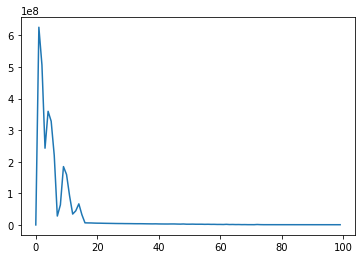

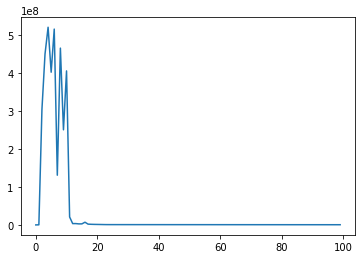

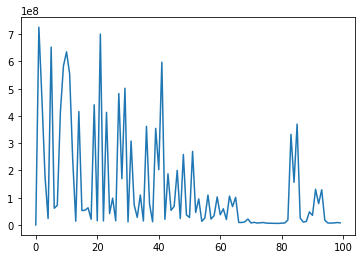

In [217]:
svm_classifier=trainSVM(X,Y)

### As we can see all one to one classifiers are doing well

In [218]:
svm_classifier[0][1]

(array([ 9.95926678,  3.4279288 , -0.33618737, ...,  9.30169457,
        -0.31711359, -4.80061018]),
 0.004000000000000027)

### Prediction

In [244]:
def binaryPredict(x_test,wts,b):
    pred=np.dot(wts,x_test.T)+b
    if pred>0:
        return 1
    else:
        return -1
def predict(x_test):
    classes=np.unique(Y)
    count=np.zeros((len(classes),))
    for i in range(len(classes)):
        for j in range(i+1,len(classes)):
            wts,b=svm_classifier[i][j]
            pred=binaryPredict(x_test,wts,b)
            if(pred==1):
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    return final_prediction

In [220]:
classes

array(['Bulbasaur', 'Charmander', 'Pikachu'], dtype='<U10')

In [221]:
predict(X[0])

1

1


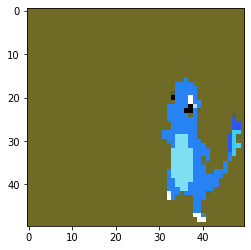

In [222]:
print(Y[0])
plt.imshow(image_data[0])

In [223]:
def accuracy(X,Y):
    correctly_classified=0
    m=X.shape[0]
    for i in range(m):
        prediction=predict(X[i])
        if prediction==Y[i]:
            correctly_classified+=1
    return (correctly_classified/m)*100

In [224]:
accuracy=accuracy(X,Y)
print(accuracy)

98.68421052631578


In [237]:
## Loading Our Test data
pth=Path('Test/Images/')
dirs=pth.glob('*')
test_img_id=[]
test_image_data=[]
for img_name in dirs:
    label=str(img_name).split('/')[-1]
    test_img_id.append(label)
    img=cv2.imread(str(img_name))
    img=cv2.resize(img,(50,50))
    test_image_data.append(img)

In [238]:
x_test=np.array(test_image_data)

In [239]:
x_test=x_test.reshape((x_test.shape[0],-1))

In [240]:
x_test.shape

(123, 7500)

In [245]:
predict(x_test[0])


0

In [229]:
y_test=np.zeros((x_test.shape[0]),dtype='int')
for i in range(x_test.shape[0]):
    y_test[i]=predict(x_test[i])

In [230]:
y_test

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1])

In [231]:
predictions=le.inverse_transform(y_test)
predictions=predictions.reshape((predictions.shape[0],1))
predictions.shape

(123, 1)

In [232]:
test_img_id=np.array(test_img_id)
test_img_id=test_img_id.reshape((test_img_id.shape[0],1))
test_img_id.shape

(123, 1)

In [233]:
final_data=np.hstack((test_img_id,predictions))
print(final_data)

[['1140.jpg' 'Bulbasaur']
 ['1132.jpg' 'Bulbasaur']
 ['1126.jpg' 'Bulbasaur']
 ['2215.jpg' 'Charmander']
 ['2201.jpg' 'Charmander']
 ['2229.jpg' 'Charmander']
 ['2017.jpg' 'Pikachu']
 ['2003.jpg' 'Pikachu']
 ['2002.jpg' 'Pikachu']
 ['2016.jpg' 'Pikachu']
 ['2228.jpg' 'Charmander']
 ['2200.jpg' 'Charmander']
 ['2214.jpg' 'Pikachu']
 ['1127.jpg' 'Bulbasaur']
 ['1133.jpg' 'Bulbasaur']
 ['1119.jpg' 'Bulbasaur']
 ['1125.jpg' 'Bulbasaur']
 ['1131.jpg' 'Bulbasaur']
 ['2202.jpg' 'Charmander']
 ['2216.jpg' 'Charmander']
 ['2000.jpg' 'Pikachu']
 ['2014.jpg' 'Pikachu']
 ['2028.jpg' 'Pikachu']
 ['2029.jpg' 'Pikachu']
 ['2015.jpg' 'Pikachu']
 ['2001.jpg' 'Pikachu']
 ['2217.jpg' 'Charmander']
 ['2203.jpg' 'Charmander']
 ['1130.jpg' 'Bulbasaur']
 ['1124.jpg' 'Bulbasaur']
 ['1118.jpg' 'Bulbasaur']
 ['1120.jpg' 'Bulbasaur']
 ['1134.jpg' 'Bulbasaur']
 ['1108.jpg' 'Bulbasaur']
 ['2207.jpg' 'Charmander']
 ['2213.jpg' 'Charmander']
 ['2039.jpg' 'Pikachu']
 ['2005.jpg' 'Pikachu']
 ['2011.jpg' 'Pikachu']
 ['

### As we got our predictions we will export this to a csv file with test_img_id as first column and 2nd column as prediction

In [234]:
df=pd.DataFrame(data=final_data,columns=['ImageId','Name Of Pokemon'])
df.head(n=5)

,ImageId,Name Of Pokemon
0,1140.jpg,Bulbasaur
1,1132.jpg,Bulbasaur
2,1126.jpg,Bulbasaur
3,2215.jpg,Charmander
4,2201.jpg,Charmander


In [235]:
df.to_csv('predictions_Pokemon_Go2.csv',index=False)